## Importing Librarries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
mcdonalds = pd.read_csv("mcdonalds.csv")
print(mcdonalds.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [3]:
mcdonalds.shape

(1453, 15)

In [4]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
MD_x = mcdonalds.iloc[:, 0:11].values

# Handle string values in the "Like" column
MD_x[MD_x[:, 10] == "I love it!+5", 10] = "5"

MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


## PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)


explained_variance = np.var(MD_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumulative_proportion = np.cumsum(explained_variance_ratio)

# Get the summary
summary = pd.DataFrame({
    'Standard deviation': np.sqrt(explained_variance),
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_proportion
})
print(summary)




    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.756789                0.299447               0.299447
1             0.607246                0.192797               0.492244
2             0.504446                0.133045               0.625290
3             0.398661                0.083096               0.708386
4             0.337289                0.059481               0.767866
5             0.310168                0.050300               0.818166
6             0.289598                0.043849               0.862015
7             0.275027                0.039548               0.901563
8             0.265160                0.036761               0.938323
9             0.248756                0.032353               0.970677
10            0.236821                0.029323               1.000000


In [9]:
print("\nPrincipal Components:")
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
print(pd.DataFrame(pca.components_, columns=names))


Principal Components:
         pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  -0.476933 -0.155332 -0.006356  0.116232  0.304443 -0.108493 -0.337186   
1   0.363790  0.016414  0.018809 -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444 -0.062515 -0.037019 -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162 -0.142425  0.197619 -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535  0.277608  0.070620 -0.073405  0.361399  0.107930 -0.128973   
5   0.170738 -0.347830 -0.355087 -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519 -0.059738  0.707637 -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041 -0.113079  0.375934  0.589622 -0.138241 -0.627799  0.140060   
8   0.572403 -0.018465  0.400280 -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284 -0.665818 -0.075634 -0.005338  0.008707  0.239532  0.428087   
10  0.045439 -0.541616  0.141730  0.250910  0.001642  0.339265 -0.489283   

         pc8       pc9      pc10      pc11  
0  -0.471514  0.329

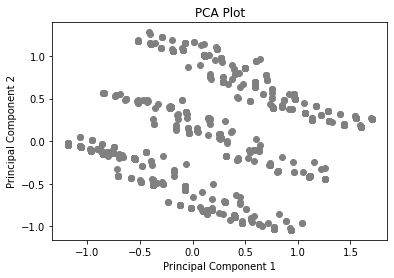

In [10]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

## Encoding Categorical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in mcdonalds.columns[:11]:
    mcdonalds[column] = le.fit_transform(mcdonalds[column])
mcdonalds.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


## K-means Clustering

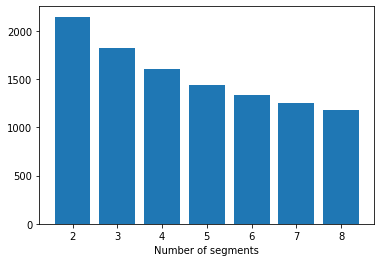

In [12]:
# Perform K-means clustering
from sklearn.cluster import KMeans
k_values = range(2, 9)
results = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    results.append(kmeans)

# Plot number of segments vs. within-cluster sum of squares
plt.bar(k_values, [res.inertia_ for res in results])
plt.xlabel("Number of segments")
plt.show()

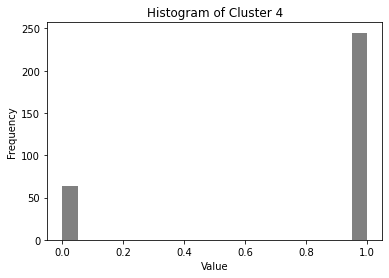

In [13]:
#  Select the KMeans model for Cluster 4 (assuming it's the fourth model in the 'results' list)
cluster_4_kmeans = results[3]  # Adjust the index accordingly (Python uses 0-based indexing)

# Get the cluster labels for Cluster 4
cluster_4_labels = cluster_4_kmeans.labels_

# Assuming you have MD_x as the preprocessed data (containing the same features as used in K-means)

# Create a DataFrame with the cluster labels and the original data
mcdonalds_clustered = pd.DataFrame(data=MD_x, columns=[f"Feature_{i+1}" for i in range(MD_x.shape[1])])
mcdonalds_clustered["Cluster"] = cluster_4_labels

# Plot the histogram for the data points in Cluster 4
cluster_4_data = mcdonalds_clustered[mcdonalds_clustered["Cluster"] == 3]["Feature_1"]
plt.hist(cluster_4_data, bins=20, range=(0, 1), color="grey")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster 4")
plt.show()

## Guassian

In [14]:
# Fit Gaussian mixture models for different number of components (2 to 8)
from sklearn.mixture import GaussianMixture
k_values = range(2, 9)
models = []
for k in k_values:
    model = GaussianMixture(n_components=k)
    model.fit(MD_x)
    models.append(model)

# Print the fitted mixture models
for i, model in enumerate(models):
    print(f"Model {i+2}:")
    print(model)

Model 2:
GaussianMixture(n_components=2)
Model 3:
GaussianMixture(n_components=3)
Model 4:
GaussianMixture(n_components=4)
Model 5:
GaussianMixture(n_components=5)
Model 6:
GaussianMixture(n_components=6)
Model 7:
GaussianMixture(n_components=7)
Model 8:
GaussianMixture(n_components=8)


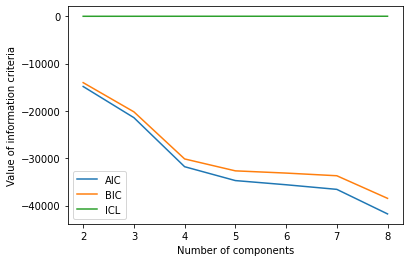

In [15]:
AIC = [model.aic(MD_x) for model in models]
BIC = [model.bic(MD_x) for model in models]
ICL = [model.lower_bound_ for model in models]
plt.plot(k_values, AIC, label="AIC")
plt.plot(k_values, BIC, label="BIC")
plt.plot(k_values, ICL, label="ICL")
plt.ylabel("Value of information criteria")
plt.xlabel("Number of components")
plt.legend()
plt.show()

In [16]:
# Extract the model with the desired number of components
desired_k = 4
desired_model = models[desired_k - 2]

# Obtain the cluster assignments from the desired model
MD_m4_clusters = desired_model.predict(MD_x)

# Compare cluster assignments from K-means and Gaussian mixture model
kmeans = KMeans(n_clusters=desired_k, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)

Mixture    0    1    2    3
K-means                    
0        103    2  391   17
1         43    8    0  315
2          0  217    0   25
3         47   40  231   14


In [17]:
# Fit a Gaussian mixture model with fixed cluster assignments
MD_m4a = GaussianMixture(n_components=desired_k)
MD_m4a.fit(MD_x, MD_m4_clusters)

# Compare cluster assignments from K-means and the fitted Gaussian mixture model
MD_m4a_clusters = MD_m4a.predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4a_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)


Mixture    0    1    2    3
K-means                    
0          0  199    0  314
1          0   68  253   45
2         34    4  202    2
3        254   44    0   34


In [18]:
# Calculate log-likelihoods of the fitted Gaussian mixture models
loglik_m4a = MD_m4a.score(MD_x)
loglik_m4 = desired_model.score(MD_x)
print(f"Log-Likelihood (Mixture Model with Fixed Clusters): {loglik_m4a}")
print(f"Log-Likelihood (Fitted Mixture Model): {loglik_m4}")

Log-Likelihood (Mixture Model with Fixed Clusters): 5.879117538292928
Log-Likelihood (Fitted Mixture Model): 11.151316714845828


In [19]:
# Reverse levels of the 'Like' variable
like_table = mcdonalds['Like'].value_counts().sort_index(ascending=False)
like_table_rev = like_table.iloc[::-1]
print(like_table_rev)

+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: Like, dtype: int64


In [20]:
# Replace the problematic value with NaN
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a new variable 'Like.n' by subtracting 'Like' from 6
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Drop rows with NaN values in 'Like.n'
mcdonalds = mcdonalds.dropna(subset=['Like.n'])

# Create a frequency table of 'Like.n'
like_n_table = mcdonalds['Like.n'].value_counts().sort_index()
print(like_n_table)

2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like.n, dtype: int64


In [21]:
# Construct the formula for the regression model
formula = 'Like.n ~ ' + ' + '.join(mcdonalds.columns[0:11])
print(formula)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
